# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [3]:
p_apple = 60/100
p_orange = 40/100

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

We are working with a bernouli series with replacement, so binomial distribution.  

the binomial coefficient will be equal to 1 and the index of q will be 0 so:


$$ \begin{align}
P_{apple first 5} &= \binom{5}{5} {P_{apple}}^5 \cdot q^0  \\
&= {P_{apple}}^5 \\
&= \left( \frac{6}{10} \right)^{5} \\
 
 \end{align}$$

In [4]:
p_apple_first_5 = 0.6**5
p_apple_first_5

0.07775999999999998

The same logic applies to oranges

$$ \begin{align}
P_{orange first 15} &= \binom{15}{15} {P_{orange}}^{15} \cdot q^0  \\
&= {P_{orange}}^{15} \\
 &= \left( \frac{4}{10} \right)^{15} \\
 
 \end{align}$$

In [5]:
p_orange_first_15 = 0.4**15
p_orange_first_15

1.073741824000001e-06

since we have replacement, the events of apple and orange are independent. so:
$$ \begin{align}  
P_{5 apples then 15 oranges} &=   P_{apple first 5} \cdot P_{orange first 15} \\  
&=   \left(\frac{6}{10} \right) ^{5} \cdot \left (\frac{4}{10} \right) ^{15} \\  
\end{align} $$



In [15]:
p_5apples_then_15oranges = (0.6**5) * (0.4**15)
p_5apples_then_15oranges

8.349416423424006e-08

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

We calculate the proability of 5 apples in a sample of 20, as this is the same as 5 apples and 15 oranges.

$$
P_{sample5apples15oranges} = \binom{20}{5}  P_{apple}^{5} \cdot P_{orange}^{15}
$$ 



In [7]:
p_sample_5apples_15_oranges = math.comb(20,5) * ((0.6)**5) * ((0.4)**15)
p_sample_5apples_15_oranges

0.0012944935222876579

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

The CDF of this binomial distribution is the summation of all probability calucations of apples for 4 and below.

$$
P_{apples < 5} = \sum_{k=0}^{4}  \binom{20}{k}  P_{apple}^{k} \cdot P_{orange}^{20-k}


$$


In [8]:
cdf_apples_less_5 = stats.binom.cdf(4,20,0.6)
cdf_apples_less_5 

np.float64(0.00031703112116863004)

<!-- **Plot the PDF (probability distributiom function) for the above binomial distribution.** -->

**Plot the Probability Mass Function (PMF) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [9]:
pmf_apples = stats.binom.pmf(np.arange(0,21),20,0.6)
pmf_apples




array([1.09951163e-08, 3.29853488e-07, 4.70041221e-06, 4.23037099e-05,
       2.69686150e-04, 1.29449352e-03, 4.85435071e-03, 1.45630521e-02,
       3.54974396e-02, 7.09948791e-02, 1.17141551e-01, 1.59738478e-01,
       1.79705788e-01, 1.65882266e-01, 1.24411699e-01, 7.46470195e-02,
       3.49907904e-02, 1.23496907e-02, 3.08742268e-03, 4.87487792e-04,
       3.65615844e-05])

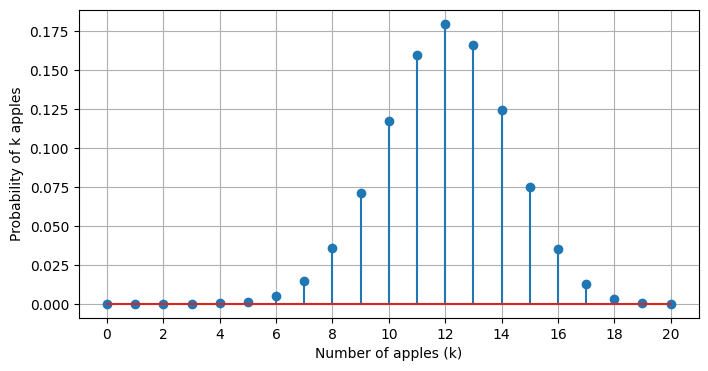

In [18]:
plt.figure(figsize=(8, 4))
plt.stem(np.arange(0,21), pmf_apples)
plt.xticks(np.arange(0,21,2))
plt.xlabel("Number of apples (k)")
plt.ylabel("Probability of k apples")
plt.grid(True)
plt.show()


## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

The unit of time being used is a football match.

In [11]:
prob_5_goals = stats.poisson.pmf(5,2.3)
prob_5_goals

np.float64(0.053775025581946814)

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

plotting the probability of k goals over the course of one game.

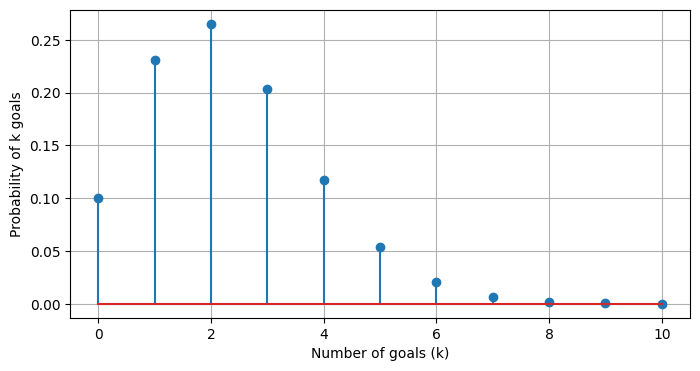

In [17]:
plt.figure(figsize=(8, 4))
plt.stem(np.arange(0,11),stats.poisson.pmf(np.arange(0,11),2.3))
plt.xticks(np.arange(0,11,2))
plt.xlabel("Number of goals (k)")
plt.ylabel("Probability of k goals")
plt.grid(True)
plt.show()